## **Titanic Survival Prediction Analysis - Classification Project**

## Overview

This repository contains a data science project focused on predicting the survival of Titanic passengers using machine learning models. The dataset includes information about passengers, such as their age, sex, class, and other features, with the goal of predicting whether a passenger survived or not.

## Dataset Information:-

The dataset used in this project is sourced from the Titanic dataset. It includes the following columns:-

- **PassengerId:-** Unique identifier for each passenger
- **Survived:-** Binary variable indicating whether the passenger survived (1) or not (0)
- **Pclass:-** Passenger class (1st, 2nd, or 3rd)
- **Name:-** Passenger's name
- **Sex:-** Passenger's gender (0 for male, 1 for female)
- **Age:-** Passenger's age
- **SibSp:-** Number of siblings/spouses aboard
- **Parch:-** Number of parents/children aboard
- **Ticket:-** Ticket number
- **Fare:-** Fare paid for the ticket
- **Cabin:-** Cabin number
- **Embarked:-** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

The data has been split into two groups:-
- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Variable |	Definition | Key
----------|--------------|-----
survival |	Survival |	0 = No, 1 = Yes
pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex	|
Age	| Age in years	|
sibsp |	# of siblings / spouses aboard the Titanic	|
parch |	# of parents / children aboard the Titanic	|
ticket |	Ticket number |	
fare |	Passenger fare	|
cabin |	Cabin number	|
embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

## Data Preprocessing

1. **Handling Missing Values:-**
   - Addressed missing values in the 'Age' column by replacing them with the mean age.
   - Filled missing 'Embarked' values with the most common port.
   - Imputed missing 'Fare' values with the median.

2. **Encoding Categorical Variables:-**
   - Converted categorical variables like 'Sex' into numerical format (0 for male, 1 for female).
   - Created binary columns ('Q' and 'S') to represent the 'Embarked' variable.

## Data Visualization

1. **Count Plot:-**
   - Visualized the distribution of the 'Survived' variable using Seaborn's count plot.

2. **Feature Distribution Plot:-**
   - Plotted the distribution of the 'Fare' feature to understand the spread of ticket prices.

3. **Survival Rate by Class:-**
   - Created a bar plot to show the survival rate based on passenger class.

## Model Training

1. **Random Forest Classifier:-**
   - Utilized a Random Forest Classifier with parameters:-
      - Number of Estimators:- 200
      - Criterion:- Gini
      - Max Features:- Auto (Square root of the total number of features)
      - Max Depth:- 8

2. **Train-Test Split:-**
   - Split the dataset into training and testing sets.

3. **Model Evaluation:-**
   - Evaluated the model's performance on the testing set using metrics like accuracy, precision, and recall.

## Prediction

1. **Generated Predictions:-**
   - Used the trained model to predict survival for new data.

## Basic Data Science Terminologies

- **Data Science:-** The interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract insights and knowledge from structured and unstructured data.

- **Data Preprocessing:-** The process of cleaning and transforming raw data into a format suitable for analysis.

- **Data Visualization:-** The graphical representation of data to reveal insights, patterns, and trends.

- **Train-Test Split:-** The practice of splitting a dataset into two subsets:- one for training a model and the other for testing its performance.

- **Machine Learning Models:-** Algorithms and statistical models that enable computers to learn patterns from data and make predictions or decisions without explicit programming.

- **Prediction:-** The process of using a trained model to make forecasts or estimations on new, unseen data.

## Dependencies

- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Scikit-learn

## How to Run

1. Clone the repository.
2. Install the required dependencies using `pip install -r requirements.txt`.
3. Run the Jupyter notebook or Python script.






In [88]:
import warnings
# Disable all warnings
warnings.filterwarnings ('ignore')

# Re-enable warnings if needed
# warnings.filterwarnings (default) 

## **Import necessary libraries**

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Loading the dataset**

In [90]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
## statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
## datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Data Preprocessing**

In [93]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [95]:
## find the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [96]:
# drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)

In [97]:
df['Age'].mean()

29.881137667304014

In [98]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [99]:
df['Embarked'].mode()[0]

'S'

In [100]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## **Data Visualization**

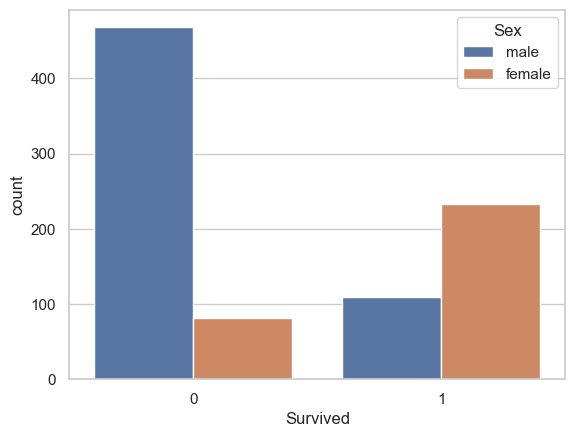

In [101]:
## categorical attributes
sns.countplot(data=train,x=train['Survived'],hue=train['Sex'])
plt.show()

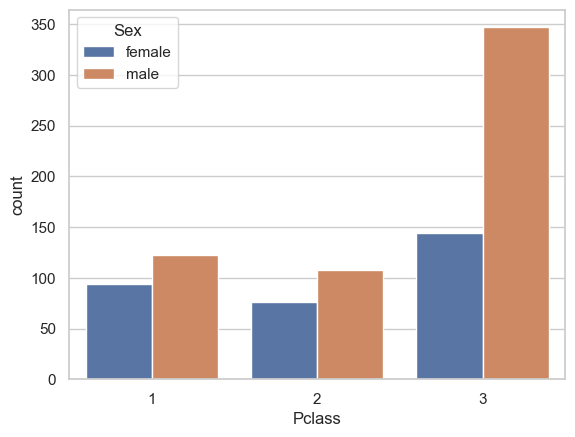

In [102]:
sns.countplot(data=train,x=train['Pclass'],hue=train['Sex'])
plt.show()

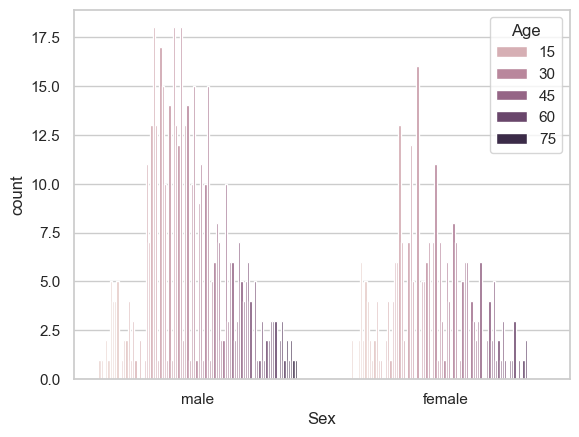

In [103]:
sns.countplot(data=train,x=train['Sex'],hue=train['Age'])
plt.show()

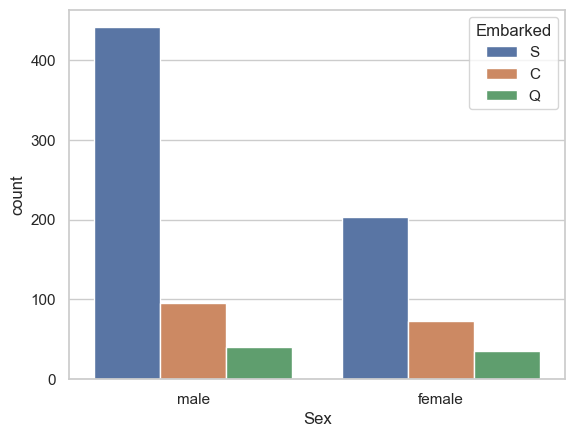

In [104]:
sns.countplot(data=train,x=train['Sex'],hue=train['Embarked'])
plt.show()

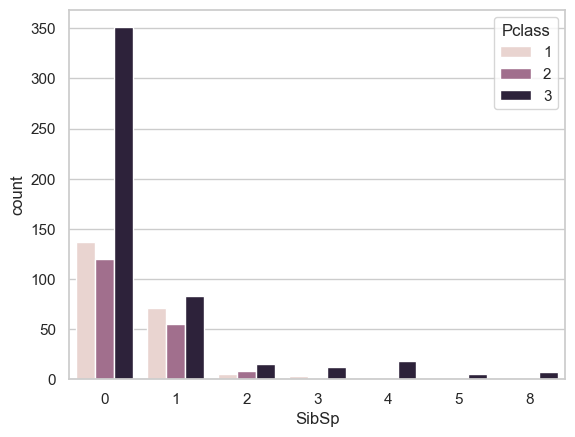

In [105]:
sns.countplot(data=train,x=train['SibSp'],hue=train['Pclass'])
plt.show()

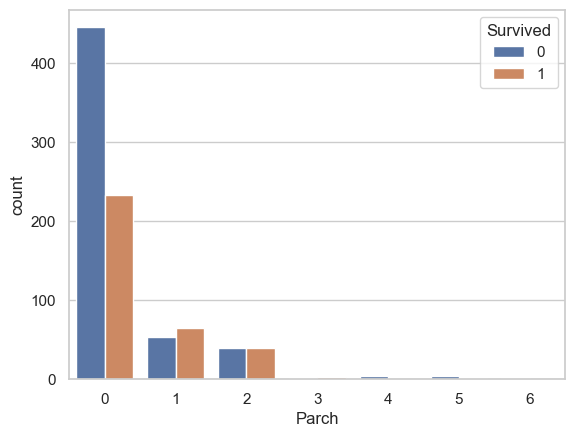

In [106]:
sns.countplot(data=train,x=train['Parch'],hue=train['Survived'])
plt.show()

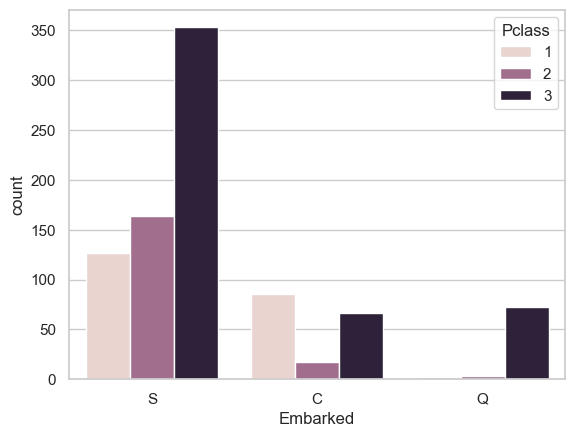

In [107]:
sns.countplot(x=train['Embarked'],hue=train['Pclass'])
plt.show()

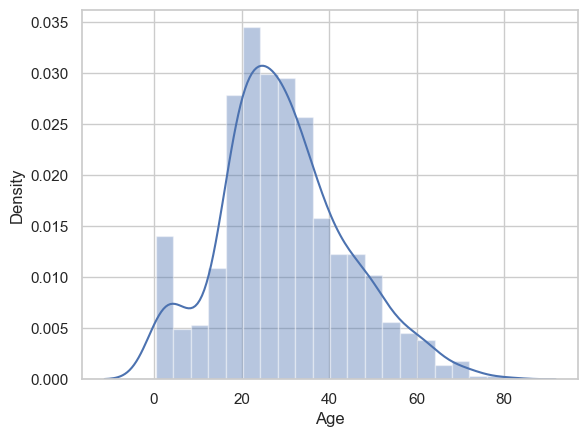

In [108]:
## numerical attributes
sns.distplot(train['Age'])
plt.show()

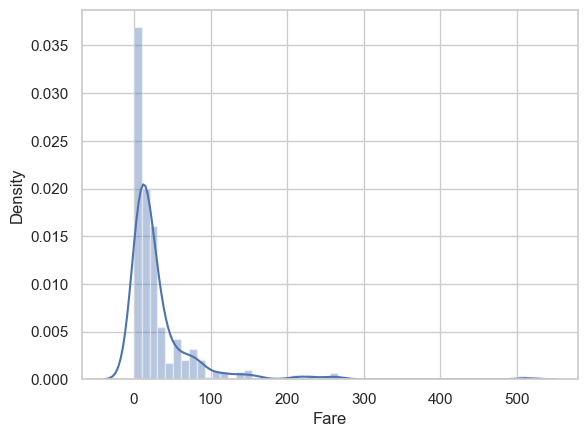

In [109]:
sns.distplot(train['Fare'])
plt.show()

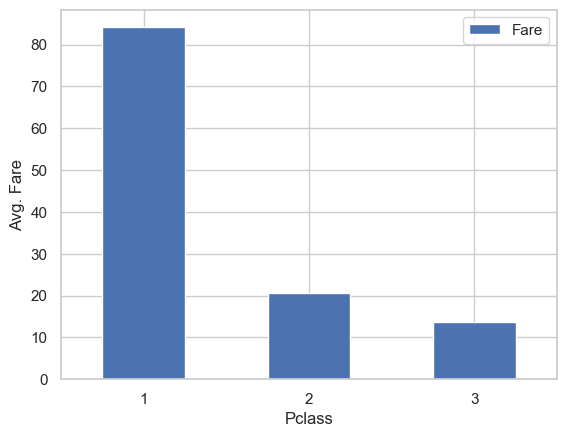

In [110]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

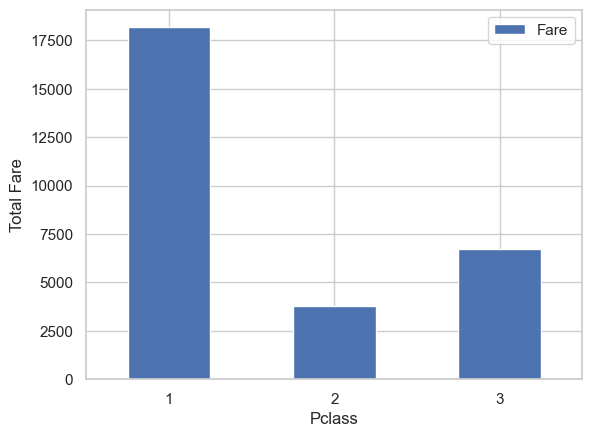

In [111]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

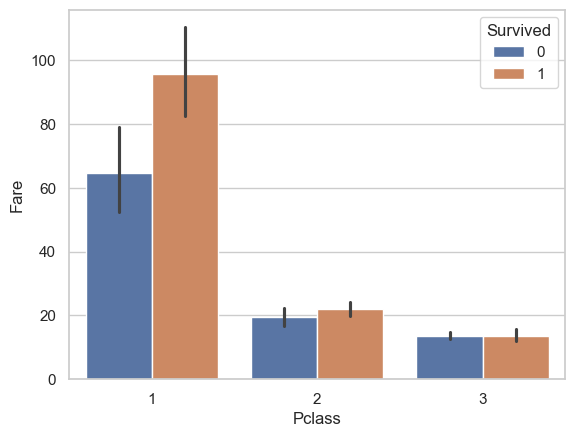

In [112]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')
plt.show()

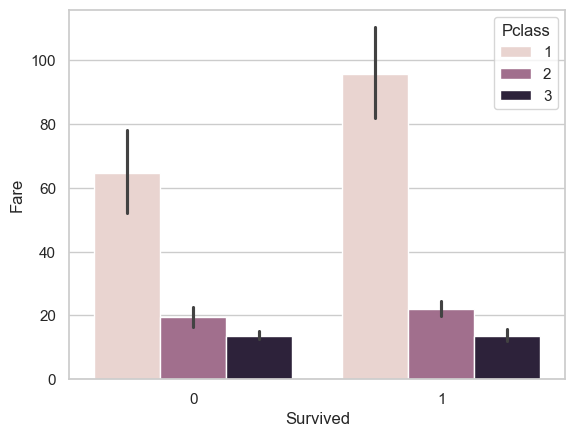

In [113]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')
plt.show()

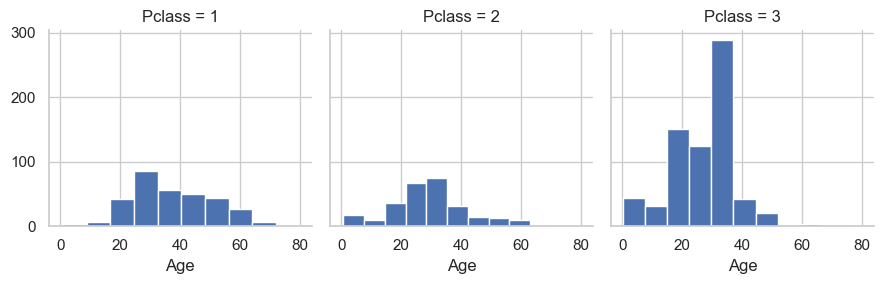

In [114]:
g = sns.FacetGrid(df, col="Pclass")
g = g.map(plt.hist, "Age")

Text(0, 0.5, 'Count')

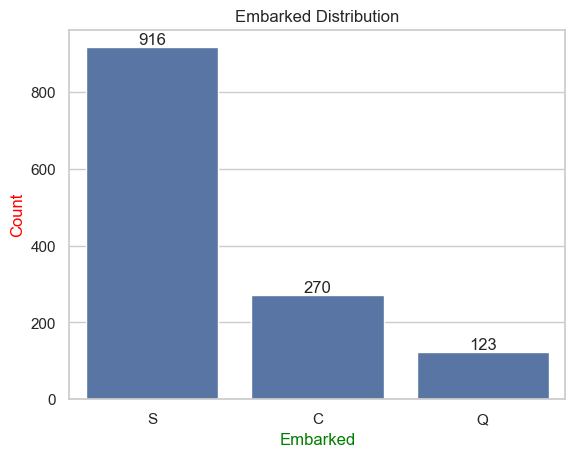

In [115]:
ax = sns.set(style="whitegrid")
ax = sns.countplot(data=df,x='Embarked')
ax.bar_label(ax.containers[0])

plt.title('Embarked Distribution')
plt.xlabel('Embarked',color='Green')
plt.ylabel('Count',color='Red')

Text(0.5, 1.0, 'Embarked Distribution')

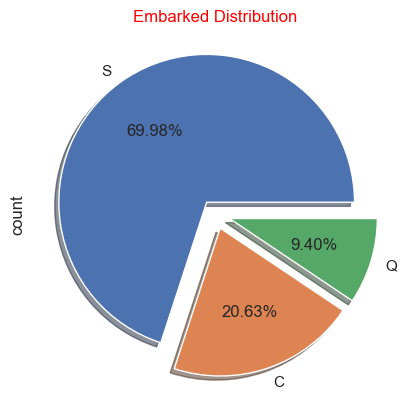

In [116]:
df['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Embarked Distribution',color='Red',loc='center')

Text(0.5, 1.0, 'Gender Distribution')

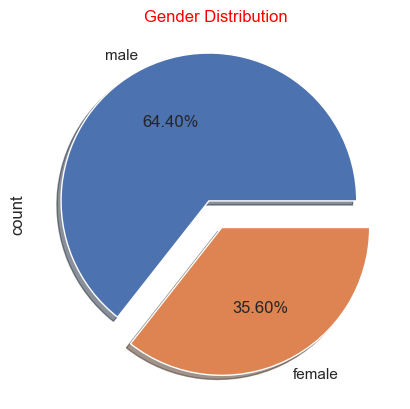

In [117]:

df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Gender Distribution',color='Red',loc='center')

Text(0.5, 1.0, 'Survived')

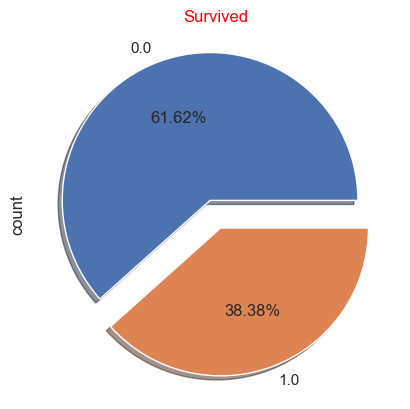

In [118]:

df['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],
                                     autopct='%1.2f%%',
                                     shadow=True)
plt.title('Survived',color='Red',loc='center')

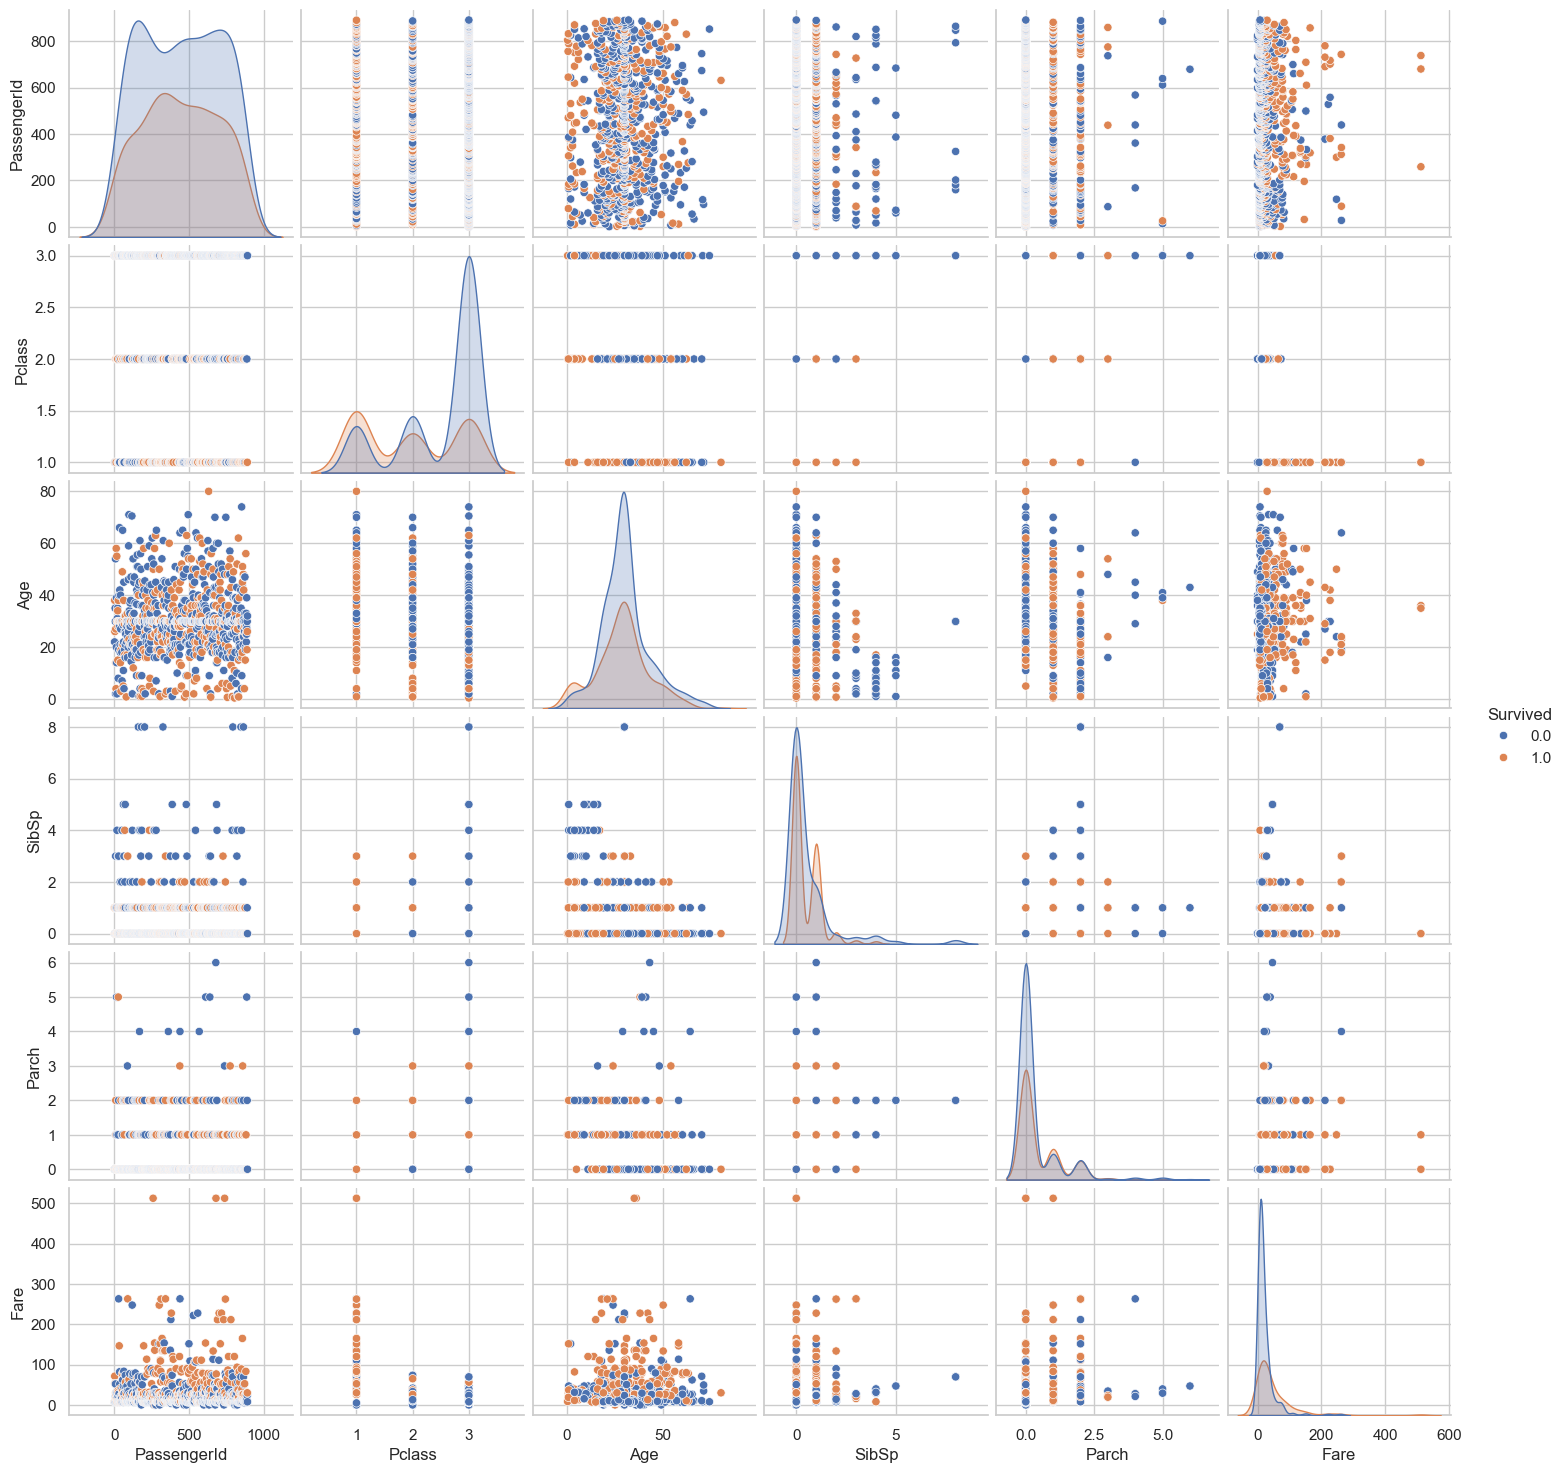

In [119]:
sns.pairplot(df,hue='Survived')
plt.show()

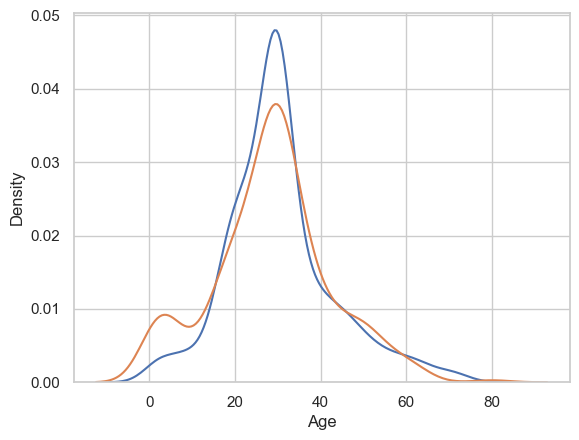

In [120]:
sns.distplot(a=df[df['Survived']==0]['Age'],hist=False)
sns.distplot(a=df[df['Survived']==1]['Age'],hist=False)
plt.show()

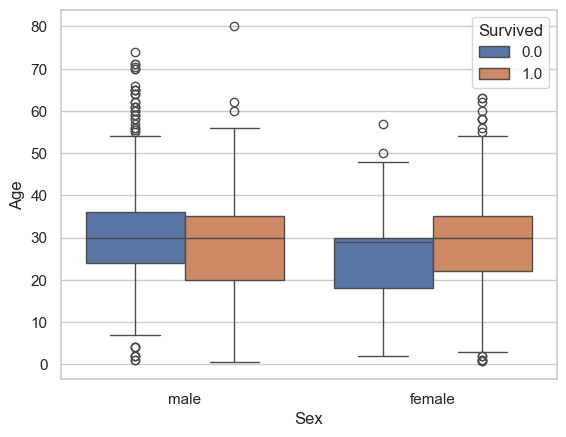

In [121]:
sns.boxplot(x=df['Sex'],y=df['Age'],hue=df['Survived'])
plt.show()

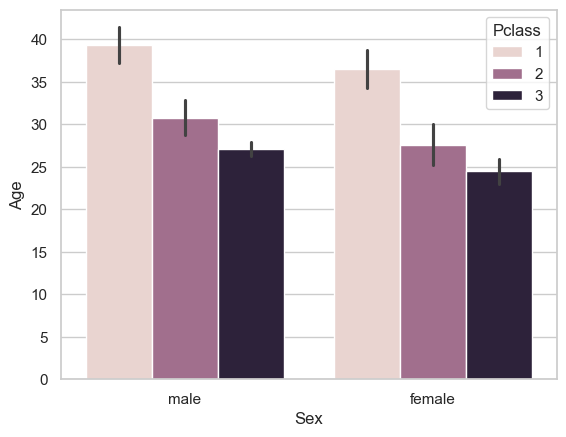

In [122]:
sns.barplot(x=df['Sex'],y=df['Age'],hue=df['Pclass'])
plt.show()

## **Log transformation for Uniform Data Distribution**

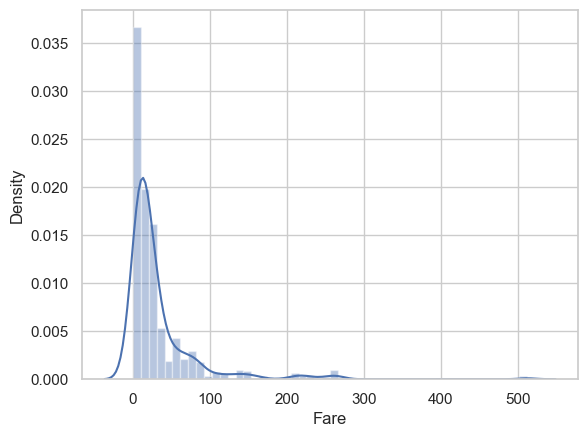

In [123]:
sns.distplot(df['Fare'])
plt.show()

In [124]:
df['Fare'] = np.log(df['Fare']+1)

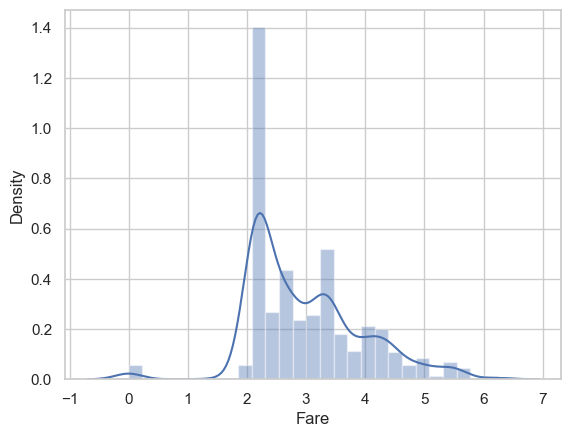

In [125]:
sns.distplot(df['Fare'])
plt.show()

## **Feature Scaling and Label Encoding**

In [126]:
from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()

df['Sex'] = lm.fit_transform(df['Sex'])

In [127]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,S


In [128]:
df_dummy = pd.get_dummies(df['Embarked'], drop_first = True)
print(df_dummy)


          Q      S
0     False   True
1     False  False
2     False   True
3     False   True
4     False   True
...     ...    ...
1304  False   True
1305  False  False
1306  False   True
1307  False   True
1308  False  False

[1309 rows x 2 columns]


In [129]:
data = pd.concat([df, df_dummy], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,S,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,C,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,S,False,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,S,False,True
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,S,False,True


In [130]:
data = data.drop('Embarked', axis=1)

In [131]:
data['Q']=data['Q'].astype('category')
data['Q']=data['Q'].cat.codes

data['S']=data['S'].astype('category')
data['S']=data['S'].cat.codes

In [132]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,0,1


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int32  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Q            1309 non-null   int8   
 11  S            1309 non-null   int8   
dtypes: float64(3), int32(1), int64(4), int8(2), object(2)
memory usage: 99.8+ KB


## **Correlation Matrix**

In [134]:
columns_to_include = data.drop(columns=['Name','Ticket','PassengerId'])
corr = columns_to_include.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.338481,-0.543351,-0.070323,-0.035322,0.081629,0.329862,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.124617,-0.366371,0.060832,0.018322,-0.685333,0.230491,0.091320
Sex,-0.543351,0.124617,1.000000,0.057397,-0.109609,-0.213125,-0.249907,-0.088651,0.115193
Age,-0.070323,-0.366371,0.057397,1.000000,-0.190747,-0.130872,0.174203,-0.012718,-0.059153
SibSp,-0.035322,0.060832,-0.109609,-0.190747,1.000000,0.373587,0.311334,-0.048678,0.073709
Parch,0.081629,0.018322,-0.213125,-0.130872,0.373587,1.000000,0.323252,-0.100943,0.071881
Fare,0.329862,-0.685333,-0.249907,0.174203,0.311334,0.323252,1.000000,-0.190664,-0.127288
Q,0.003650,0.230491,-0.088651,-0.012718,-0.048678,-0.100943,-0.190664,1.000000,-0.491656
S,-0.149683,0.091320,0.115193,-0.059153,0.073709,0.071881,-0.127288,-0.491656,1.000000


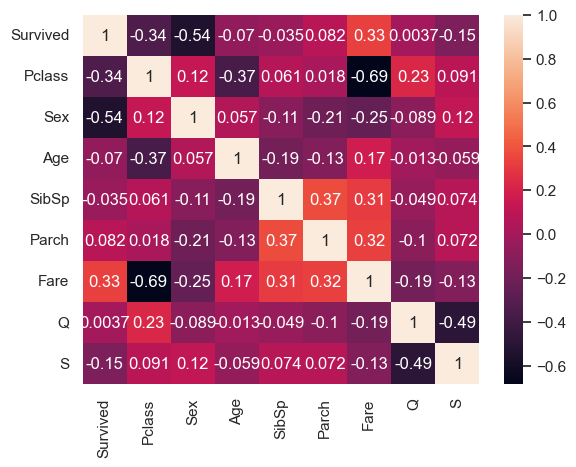

In [135]:
sns.heatmap(corr,annot=True)
plt.show()

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int32  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Q            1309 non-null   int8   
 11  S            1309 non-null   int8   
dtypes: float64(3), int32(1), int64(4), int8(2), object(2)
memory usage: 99.8+ KB


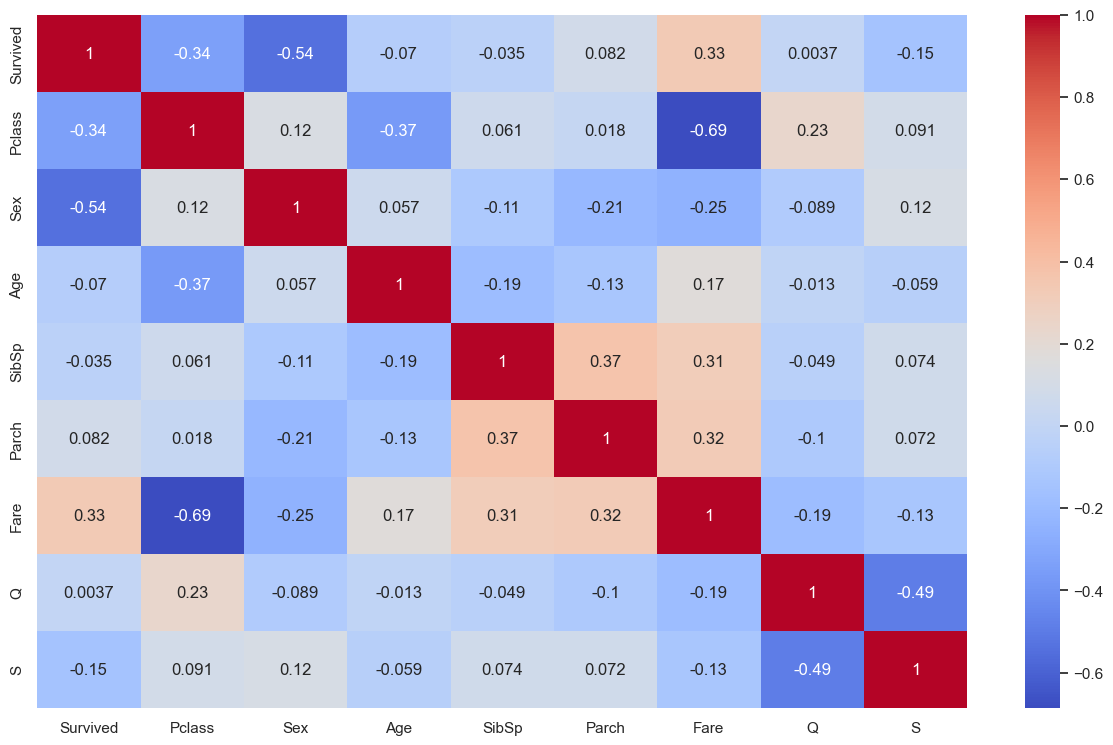

In [137]:
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [138]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,0,1


In [139]:
# ## drop unnecessary columns
# data = data.drop(columns=["Name", "Ticket"],axis=1)
# data.head()

## **Train-Test Split**

In [140]:
train = data.iloc[:train_len, :]
test = data.iloc[train_len:, :]

In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,0,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,0,1


In [142]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
891,892,NaN,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.178064,1,0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,2.079442,0,1
893,894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.369075,1,0
894,895,NaN,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.268252,0,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.586824,0,1


In [143]:
# input split
X = train.drop(columns=['PassengerId', 'Survived','Name','Ticket'], axis=1)
y = train['Survived']

In [144]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.0,1,0,2.110213,0,1
1,1,0,38.0,1,0,4.280593,0,0
2,3,0,26.0,0,0,2.188856,0,1
3,1,0,35.0,1,0,3.990834,0,1
4,3,1,35.0,0,0,2.202765,0,1


## **Model Training**

In [173]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
def classify(model):
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [174]:
from sklearn.linear_model import LogisticRegression
LG_model = LogisticRegression()
classify(LG_model)

Accuracy: 0.8071748878923767
CV Score: 0.7845144686460359


In [175]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
classify(DT_model)

Accuracy: 0.7488789237668162
CV Score: 0.7733412842884941


In [176]:
from sklearn.ensemble import RandomForestClassifier
RT_model = RandomForestClassifier()
classify(RT_model)

Accuracy: 0.7892376681614349
CV Score: 0.8125918021467579


In [177]:
from sklearn.ensemble import ExtraTreesClassifier
ET_model = ExtraTreesClassifier()
classify(ET_model)

Accuracy: 0.7982062780269058
CV Score: 0.7968802962776975


In [178]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
classify(XGB_model)

Accuracy: 0.8026905829596412
CV Score: 0.8204569706860838


In [179]:
from lightgbm import LGBMClassifier
LGBM_model = LGBMClassifier()
classify(LGBM_model)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## **Complete Model Training with Full Data**

In [180]:
model = LGBMClassifier()
model.fit(X, y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [181]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Q,S
891,892,NaN,3,"Kelly, Mr. James",1,34.5,0,0,330911,2.178064,1,0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,2.079442,0,1
893,894,NaN,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,2.369075,1,0
894,895,NaN,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,2.268252,0,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,2.586824,0,1


In [182]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived','Name','Ticket'], axis=1)

In [183]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
891,3,1,34.5,0,0,2.178064,1,0
892,3,0,47.0,1,0,2.079442,0,1
893,2,1,62.0,0,0,2.369075,1,0
894,3,1,27.0,0,0,2.268252,0,1
895,3,0,22.0,1,1,2.586824,0,1


In [184]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

## **Test Submission**

In [185]:
sub = pd.read_csv('gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [186]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [187]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [188]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [189]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [190]:
sub.to_csv('submission.csv', index=False)

In [191]:
df = pd.read_csv('submission.csv')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


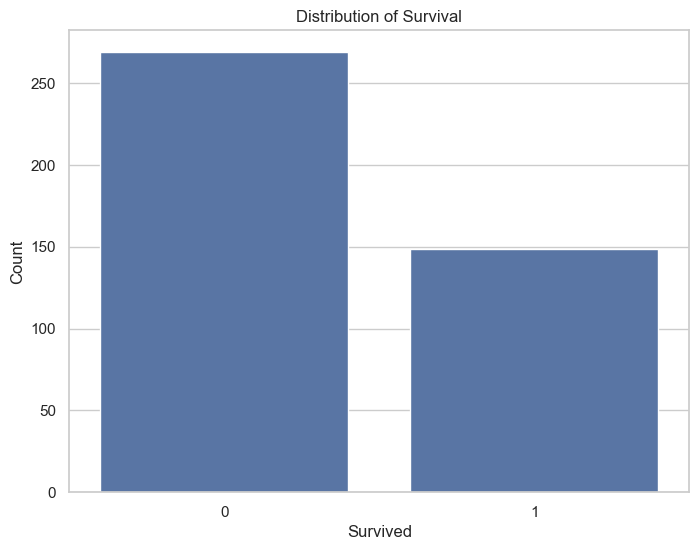

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


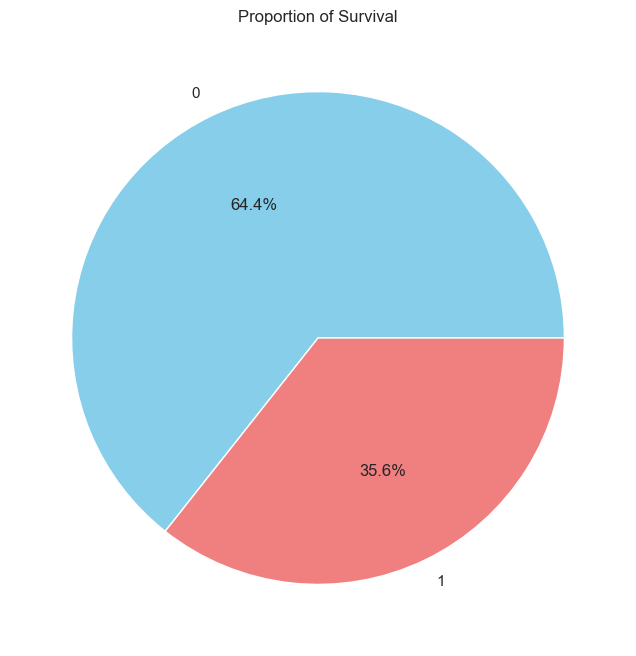

In [194]:
plt.figure(figsize=(8, 8))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Survival')
plt.ylabel('')
plt.show()


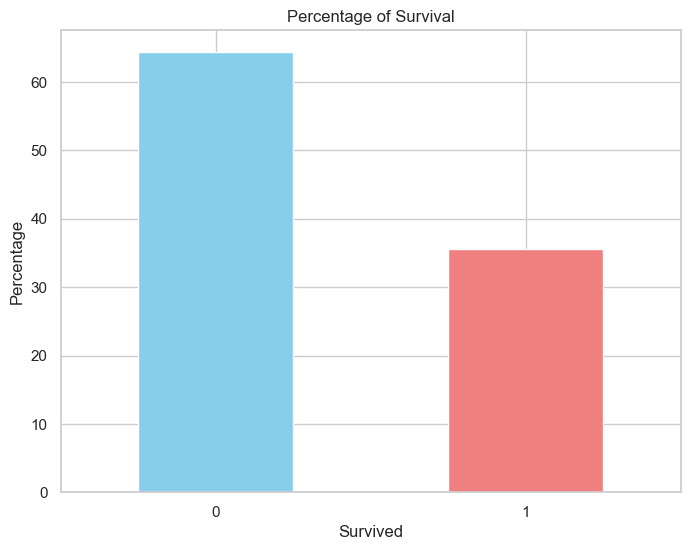

In [195]:
plt.figure(figsize=(8, 6))
(df['Survived'].value_counts(normalize=True) * 100).plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Percentage of Survival')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


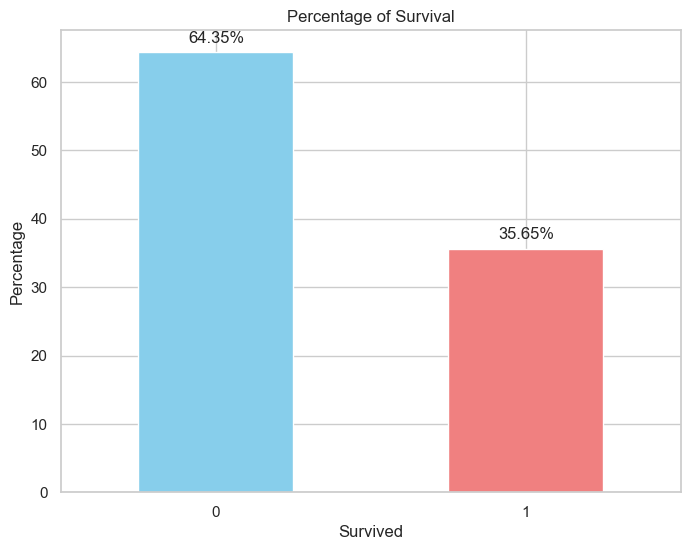

In [196]:
import matplotlib.pyplot as plt

# Assuming 'sub' is your DataFrame with the 'Survived' column
plt.figure(figsize=(8, 6))
ax = (df['Survived'].value_counts(normalize=True) * 100).plot(kind='bar', color=['skyblue', 'lightcoral'])

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Percentage of Survival')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()
